In [11]:
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network module
from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.

import torchvision # torch package for vision related things
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation

from tqdm import tqdm  # For nice progress bar!

In [23]:
# 2 conv layer 
class CNN(nn.Module):
    def __init__(self,in_channels,num_classes):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(in_channels=in_channels,
                            out_channels=8,
                            kernel_size=(3,3),
                            stride=(1,1),
                            padding=(1,1))
        self.pool=nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self.conv2=nn.Conv2d(in_channels=8,
                            out_channels=16,
                            kernel_size=(3,3),
                            stride=(1,1),
                            padding=(1,1))
        self.fc1=nn.Linear(16*7*7,num_classes)
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool(x)
        x=F.relu(self.conv2(x))
        x=self.pool(x)
        x=x.reshape(x.shape[0],-1)
        x=self.fc1(x)
        return x 

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
in_channels = 1
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 3

In [26]:
train_dataset = datasets.MNIST(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

tensor(8)


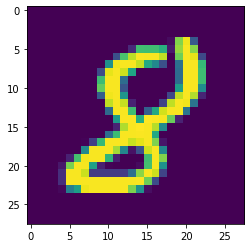

In [48]:
# visualization
import matplotlib.pyplot as plt
for i,j in train_loader:
    print(j[0])
    plt.imshow(i[0].reshape(28,28,1))
    plt.show()
    break

In [27]:
model = CNN(in_channels=in_channels, num_classes=num_classes).to(device)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [52]:
# training 
for epoch in range(num_epochs):
    for batch_idx, (data,targets) in enumerate(tqdm(train_loader)):
        data=data.to(device=device)
        targets=targets.to(device=device)
        
        scores=model(data)
        loss=criterion(scores,targets)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

100%|█████████████████████████████████████████| 938/938 [00:17<00:00, 53.07it/s]


In [54]:
def check_accuracy(loader,model):
    num_correct=0
    num_samples=0
    model.eval()
    
    with torch.no_grad():
        for data,targets in loader:
            data=data.to(device=device)
            targets=targets.to(device=device)
            
            scores = model(data)
            _, predictions = scores.max(1)
            num_correct += (predictions == targets).sum()
            num_samples += predictions.size(0)
            
    model.train()
    return num_correct/num_samples
            
    

In [55]:
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

Accuracy on training set: 98.39
Accuracy on test set: 98.32
